In [1]:
import import_ipynb
from base.datasets import load_real_path, obtain_bird_data
from base.models import OD_LR, OD_1NN, StatEcoNet_H1, StatEcoNet_H3
from base.models import OD_LR_Combined, StatEcoNet_H1_Combined, \
                        StatEcoNet_H3_Combined
from base.AAAI21_plots import supp_syn_features, main_fig5, \
                              supp_bird_survey_features, supp_bird_site_features

importing Jupyter notebook from /scratch/Eugene/codes/grt_hist/StatEcoNet/StatEcoNet/base/datasets.ipynb
importing Jupyter notebook from /scratch/Eugene/codes/grt_hist/StatEcoNet/StatEcoNet/base/models.ipynb
importing Jupyter notebook from /scratch/Eugene/codes/grt_hist/StatEcoNet/StatEcoNet/base/AAAI21_plots.ipynb


In [2]:
import torch
import numpy as np
import pandas as pd

# Selected Important Syntetic Features

In [3]:
def selected_syn_features(nSites, nVisits, rho, file_name):
    idx = 1
    if nSites == 100:
        nSites_all = 1200 # = 100 (train) + 100 (validation) + 1000 (test)
    else:
        nSites_all = 3000 # = 1000 (train) + 1000 (validation) + 1000 (test)

    data_size = str(nSites_all) + "x" + str(nVisits)
    x_dim = 10
    w_dim = 10

    opts = pd.read_csv("opt/opt_syn_NN.csv")
    nn_result = pd.read_csv("AAAI21/NN_test.csv")
    brt_features = pd.read_csv("AAAI21/brt_features.csv")
    dir_path = "AAAI21/supplement/results/synthetic/"

    # OD-BRT
    tmp = brt_features[(brt_features["nSites"] == nSites) & \
                       (brt_features["nVisits"] == nVisits) & \
                       (brt_features["rho"] == rho) & \
                       (brt_features["idx"] == idx)]
    brt_site = tmp.iloc[0,4:14].tolist()
    brt_survey = tmp.iloc[0,15:25].tolist()

    # OD-LR
    model_id = 0
    tmp = nn_result[(nn_result["nSites"] == nSites) & \
                    (nn_result["nVisits"] == nVisits) & \
                    (nn_result["rho"] == rho) & \
                    (nn_result["model.id"] == 0)]
    trial = np.argmax(tmp['test.auprc']) + 1
    full_path = dir_path + data_size + 'x' + str(rho) + 'x' + str(idx) + \
                "_m" + str(model_id) + "_w" + str(0) + "_t" + str(trial)  
    final_model = OD_LR(x_dim, w_dim)
    final_model.load_state_dict(torch.load(full_path + "_final_model.pt"))
    print(full_path)

    # OD-1NN
    model_id = 1
    opt = opts[(opts.nSites==nSites) & (opts.nVisits==nVisits) & \
               (opts.rho==rho) & (opts.model_id==model_id)]
    nN = int(opt['nNeurons'].item())
    nL = 1
    tmp = nn_result[(nn_result["nSites"] == nSites) & \
                    (nn_result["nVisits"] == nVisits) & \
                    (nn_result["rho"] == rho) & \
                    (nn_result["model.id"] == 1)]
    trial = np.argmax(tmp['test.auprc']) + 1
    full_path = dir_path + data_size + 'x' + str(rho) + 'x' + str(idx) + \
                "_m" + str(model_id) + "_w" + str(0) + "_t" + str(trial)  
    final1_model = OD_1NN(x_dim, w_dim, nVisits, nN)
    final1_model.load_state_dict(torch.load(full_path + "_final_model.pt"))
    print(full_path)

    # StatEcoNet
    model_id = 2
    opt = opts[(opts.nSites==nSites) & (opts.nVisits==nVisits) & \
               (opts.rho==rho) & (opts.model_id==model_id)]
    nN2 = int(opt['nNeurons'].item())
    nL = int(opt['nLayers'].item())
    opt_mix = opt['mixed_weight'].item()
    if opt_mix == 0: opt_mix = 0
    tmp = nn_result[(nn_result["nSites"] == nSites) & \
                    (nn_result["nVisits"] == nVisits) & \
                    (nn_result["rho"] == rho) & \
                    (nn_result["mixed.weight"] == opt_mix) & \
                    (nn_result["model.id"] == 2)]
    trial = np.argmax(tmp['test.auprc']) + 1    
    full_path = dir_path + data_size + 'x' + str(rho) + 'x' + str(idx) + \
                "_m" + str(model_id) + "_w" + str(opt_mix) + "_t" + str(trial)
    print(full_path)
    if nL == 1:
        final2_model = StatEcoNet_H1(x_dim, w_dim, nN2)
    else:
        final2_model = StatEcoNet_H3(x_dim, w_dim, nN2)
    final2_model.load_state_dict(torch.load(full_path + "_final_model.pt"))

    supp_syn_features(brt_site, brt_survey, final_model, final1_model, \
                      final2_model, x_dim, w_dim, file_name)

AAAI21/supplement/results/synthetic/3000x10x1x1_m0_w0_t3
AAAI21/supplement/results/synthetic/3000x10x1x1_m1_w0_t3
AAAI21/supplement/results/synthetic/3000x10x1x1_m2_w0.01_t4


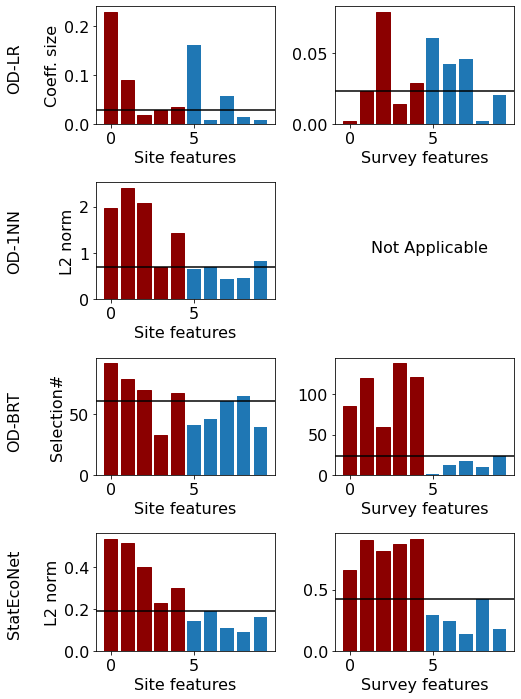

In [4]:
selected_syn_features(nSites=1000, nVisits=10, rho=1, file_name="feature_1000x10x1")

AAAI21/supplement/results/synthetic/1200x3x0x1_m0_w0_t3
AAAI21/supplement/results/synthetic/1200x3x0x1_m1_w0_t4
AAAI21/supplement/results/synthetic/1200x3x0x1_m2_w0_t5
AAAI21/supplement/results/synthetic/1200x10x0x1_m0_w0_t5
AAAI21/supplement/results/synthetic/1200x10x0x1_m1_w0_t3
AAAI21/supplement/results/synthetic/1200x10x0x1_m2_w0.01_t4
AAAI21/supplement/results/synthetic/3000x3x0x1_m0_w0_t4
AAAI21/supplement/results/synthetic/3000x3x0x1_m1_w0_t5
AAAI21/supplement/results/synthetic/3000x3x0x1_m2_w0.01_t3
AAAI21/supplement/results/synthetic/3000x10x0x1_m0_w0_t1
AAAI21/supplement/results/synthetic/3000x10x0x1_m1_w0_t4
AAAI21/supplement/results/synthetic/3000x10x0x1_m2_w0.01_t5


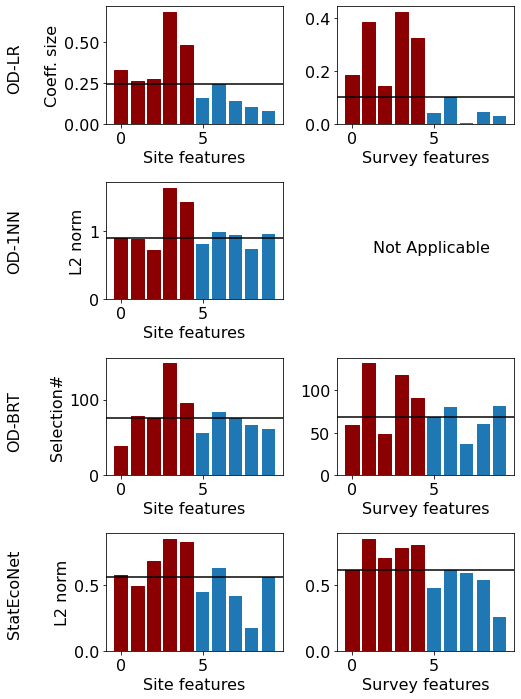

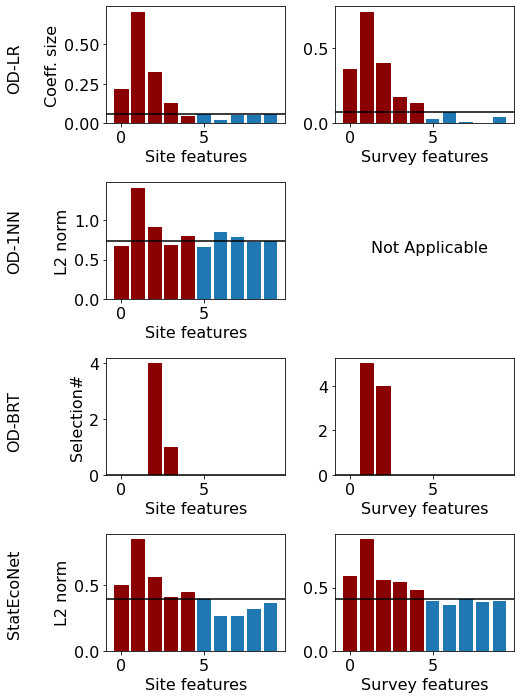

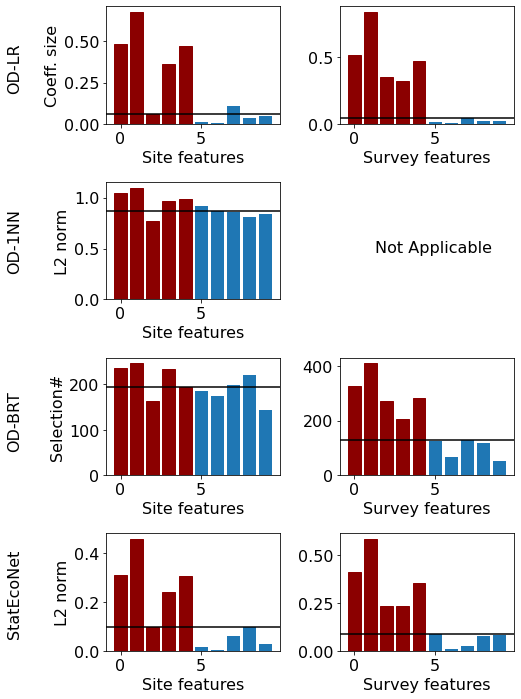

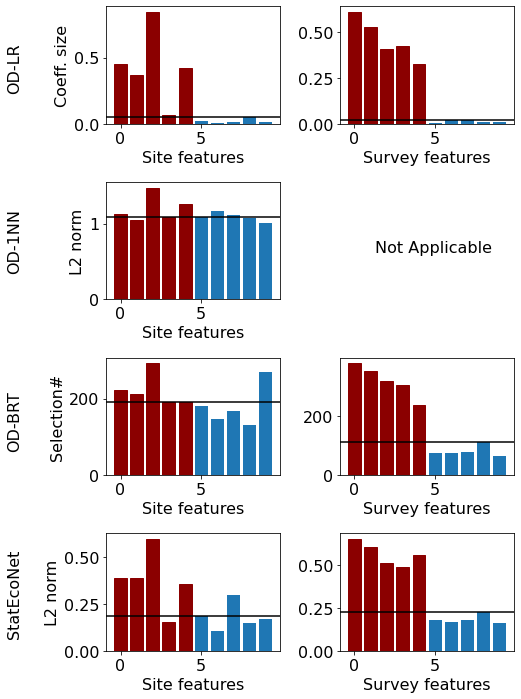

In [5]:
selected_syn_features(nSites=100, nVisits=3, rho=0, \
                      file_name="feature_100x3x0")
selected_syn_features(nSites=100, nVisits=10, rho=0, \
                      file_name="feature_100x10x0")
selected_syn_features(nSites=1000, nVisits=3, rho=0, \
                      file_name="feature_1000x3x0")
selected_syn_features(nSites=1000, nVisits=10, rho=0, \
                      file_name="feature_1000x10x0")

AAAI21/supplement/results/synthetic/1200x3x1x1_m0_w0_t3
AAAI21/supplement/results/synthetic/1200x3x1x1_m1_w0_t4
AAAI21/supplement/results/synthetic/1200x3x1x1_m2_w0.001_t3
AAAI21/supplement/results/synthetic/1200x10x1x1_m0_w0_t5
AAAI21/supplement/results/synthetic/1200x10x1x1_m1_w0_t5
AAAI21/supplement/results/synthetic/1200x10x1x1_m2_w0.001_t4
AAAI21/supplement/results/synthetic/3000x3x1x1_m0_w0_t5
AAAI21/supplement/results/synthetic/3000x3x1x1_m1_w0_t4
AAAI21/supplement/results/synthetic/3000x3x1x1_m2_w0.01_t4
AAAI21/supplement/results/synthetic/3000x10x1x1_m0_w0_t3
AAAI21/supplement/results/synthetic/3000x10x1x1_m1_w0_t3
AAAI21/supplement/results/synthetic/3000x10x1x1_m2_w0.01_t4


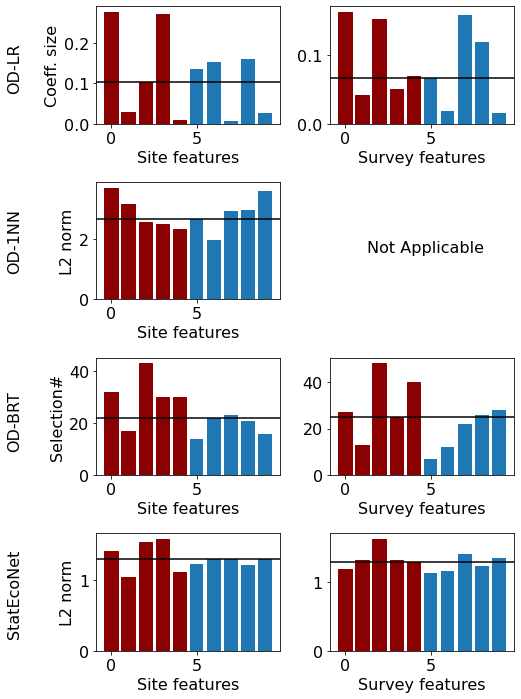

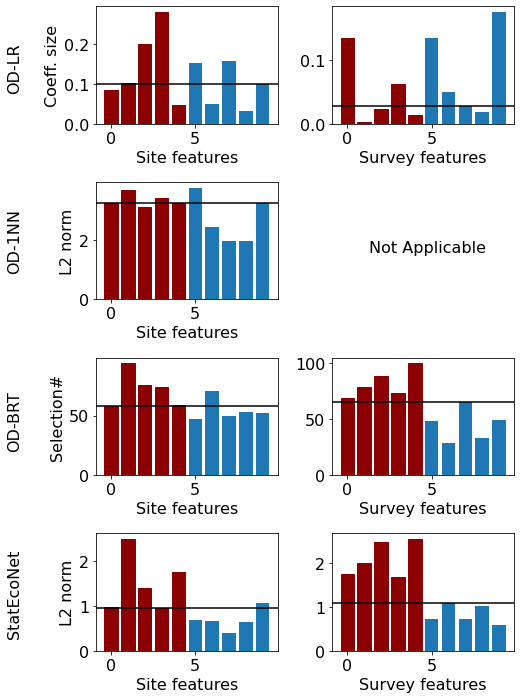

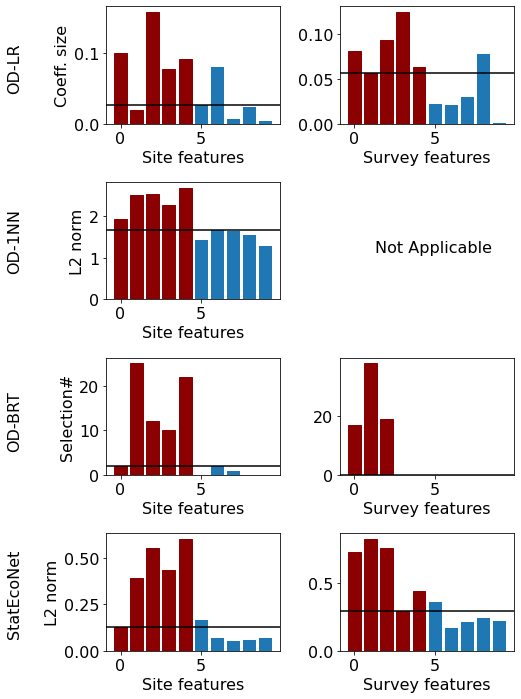

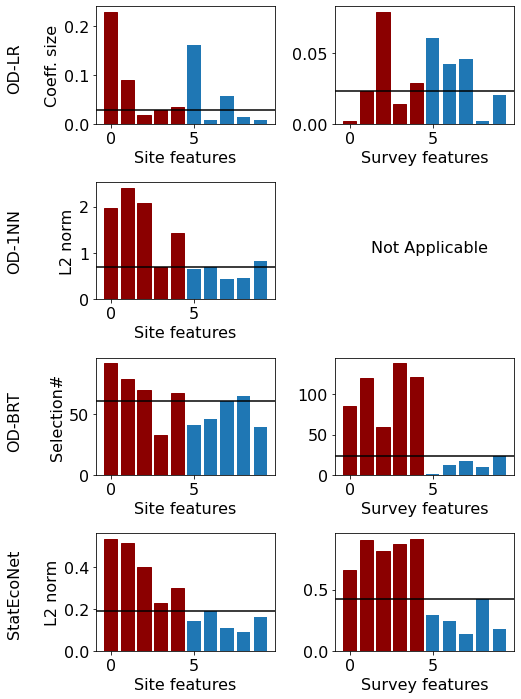

In [6]:
selected_syn_features(nSites=100, nVisits=3, rho=1, \
                      file_name="feature_100x3x1")
selected_syn_features(nSites=100, nVisits=10, rho=1, \
                      file_name="feature_100x10x1")
selected_syn_features(nSites=1000, nVisits=3, rho=1, \
                      file_name="feature_1000x3x1")
selected_syn_features(nSites=1000, nVisits=10, rho=1, \
                      file_name="feature_1000x10x1")

# Histograms for Bird Species

In [7]:
def show_density(species_name, fold, model3_reg):
    dir_path = "AAAI21/supplement/results/birds/"
    nn_result = pd.read_csv("AAAI21/NN_test_"+species_name+".csv")
    brt_result = pd.read_csv("AAAI21/BRT_test_"+species_name+".csv")

    # Load true test Y
    data_path = load_real_path(species_name)
    x_dim, w_dim, k, x_train, w_train, y_train, \
    x_valid, w_valid, y_valid, \
    x_test, w_test, y_test = obtain_bird_data(data_path, fold)

    # OD-LR
    model_id = 0
    tmp = nn_result[(nn_result["model.id"] == 0) & \
                    (nn_result["fold"] == fold)]
    assert len(tmp) == 10
    trial = np.argmax(tmp['test.auprc']) + 1
    if species_name == "Pacific Wren":
        full_path = dir_path + species_name + "_f" + str(fold) + \
                    "_m" + str(model_id) + "_w" + str(0) + "_t" + str(trial)
    else:
        full_path = dir_path + species_name + "_f" + str(fold) + \
                    "_m" + str(model_id) + "_t" + str(trial)
    psi1 = pd.read_csv(full_path + "_psi_hat.csv", header=None)
    p1 = pd.read_csv(full_path + "_p_hat.csv", header=None)
    print(full_path)

    # OD-1NN
    model_id = 1
    tmp = nn_result[(nn_result["model.id"] == 1) & \
                    (nn_result["fold"] == fold)]
    assert len(tmp) == 10
    trial = np.argmax(tmp['test.auprc']) + 1
    full_path = dir_path + species_name + "_f" + str(fold) + \
                "_m" + str(model_id) + "_w" + str(0) + "_t" + str(trial)
    psi2 = pd.read_csv(full_path + "_psi_hat.csv", header=None)
    p2 = pd.read_csv(full_path + "_p_hat.csv", header=None)
    print(full_path)

    # StatEcoNet
    model_id = 3
    tmp = nn_result[(nn_result["model.id"] == 3) & \
                    (nn_result["fold"] == fold) & \
                    (nn_result["mixed.weight"] == model3_reg)]
    assert len(tmp) == 10
    trial =  np.argmax(tmp['test.auprc']) + 1
    full_path = dir_path +species_name + "_f" + str(fold) + \
                "_m" + str(model_id) + "_w" + str(model3_reg) + "_t" + str(trial)
    psi4 = pd.read_csv(full_path + "_psi_hat.csv", header=None)
    p4 = pd.read_csv(full_path + "_p_hat.csv", header=None)
    print(full_path)

    # OD-BRT
    dir_path = "AAAI21/supplement/results/birds/BRT/"
    tmp = brt_result[brt_result.fold == fold]
    trial = np.argmax(tmp['test.auprc']) + 1
    brt_path = dir_path + species_name + "/fold" + str(fold) + \
               "/trial" + str(trial) + "/"
    psi3 = pd.read_csv(brt_path + "Pred_occProbs.csv", header=None)
    p3 = pd.read_csv(brt_path + "Pred_detProbs.csv", header=None)
    print(brt_path)

    return(psi1, p1, psi2, p2, psi3, p3, psi4, p4, y_test)

def get_fig5(species_name, f1_mix, f2_mix, f3_mix):
    psi11, p11, psi12, p12, psi13, p13, psi14, p14, y1_test = \
    show_density(species_name, 1, f1_mix)
    psi21, p21, psi22, p22, psi23, p23, psi24, p24, y2_test = \
    show_density(species_name, 2, f2_mix)
    psi31, p31, psi32, p32, psi33, p33, psi34, p34, y3_test = \
    show_density(species_name, 3, f3_mix)

    psi1 = psi11.append(psi21).append(psi31)
    p1 = p11.append(p21).append(p31)
    psi2 = psi12.append(psi22).append(psi32)
    p2 = p12.append(p22).append(p32)
    psi3 = psi13.append(psi23).append(psi33)
    p3 = p13.append(p23).append(p33)
    psi4 = psi14.append(psi24).append(psi34)
    p4 = p14.append(p24).append(p34)
    y_test = torch.cat((y1_test, y2_test, y3_test),0)

    main_fig5(y_test, psi1, p1, psi2, p2, psi3, p3, psi4, p4, species_name, \
              species_name+"_hist")

data path: ../data/OR2020/Common Yellowthroat/
AAAI21/supplement/results/birds/Common Yellowthroat_f1_m0_t10
AAAI21/supplement/results/birds/Common Yellowthroat_f1_m1_w0_t7
AAAI21/supplement/results/birds/Common Yellowthroat_f1_m3_w0_t3
AAAI21/supplement/results/birds/BRT/Common Yellowthroat/fold1/trial3/
data path: ../data/OR2020/Common Yellowthroat/
AAAI21/supplement/results/birds/Common Yellowthroat_f2_m0_t7
AAAI21/supplement/results/birds/Common Yellowthroat_f2_m1_w0_t10
AAAI21/supplement/results/birds/Common Yellowthroat_f2_m3_w0.001_t6
AAAI21/supplement/results/birds/BRT/Common Yellowthroat/fold2/trial7/
data path: ../data/OR2020/Common Yellowthroat/
AAAI21/supplement/results/birds/Common Yellowthroat_f3_m0_t4
AAAI21/supplement/results/birds/Common Yellowthroat_f3_m1_w0_t6
AAAI21/supplement/results/birds/Common Yellowthroat_f3_m3_w0.001_t3
AAAI21/supplement/results/birds/BRT/Common Yellowthroat/fold3/trial10/
data path: ../data/OR2020/Eurasian Collared-Dove/
AAAI21/supplement/res

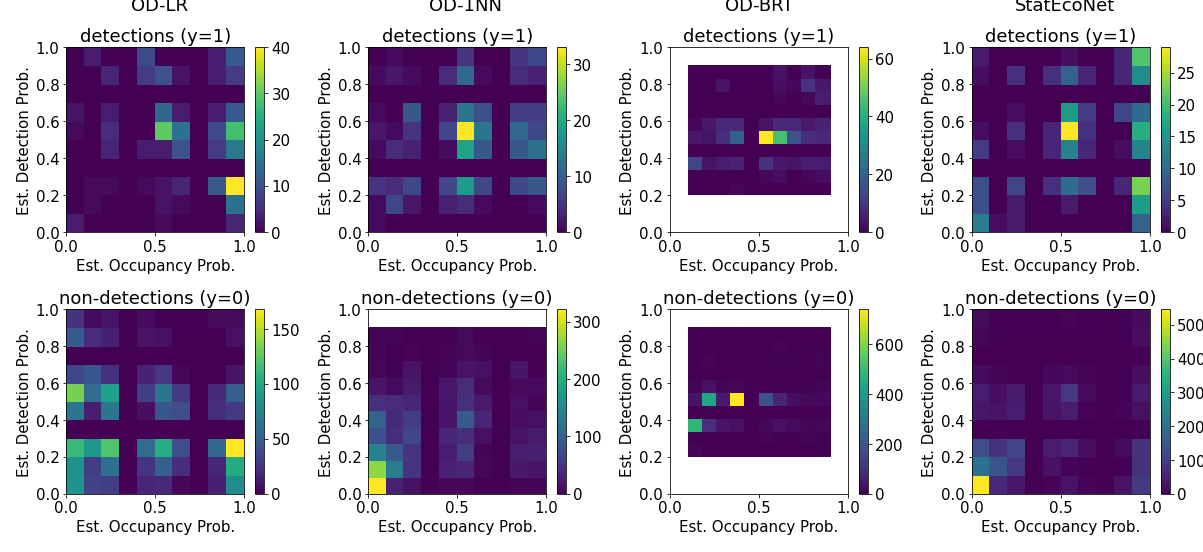

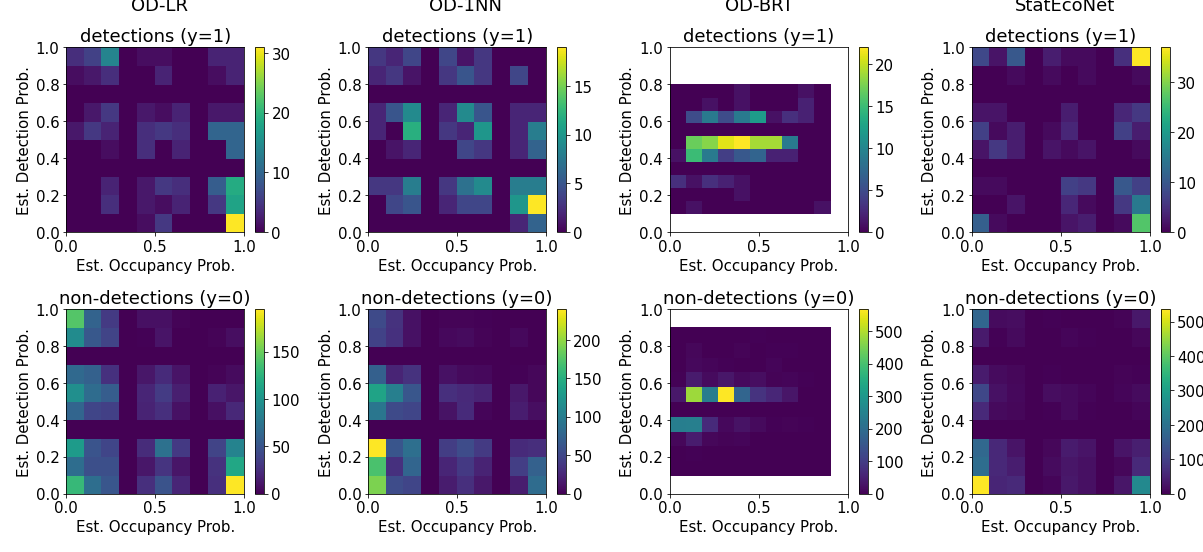

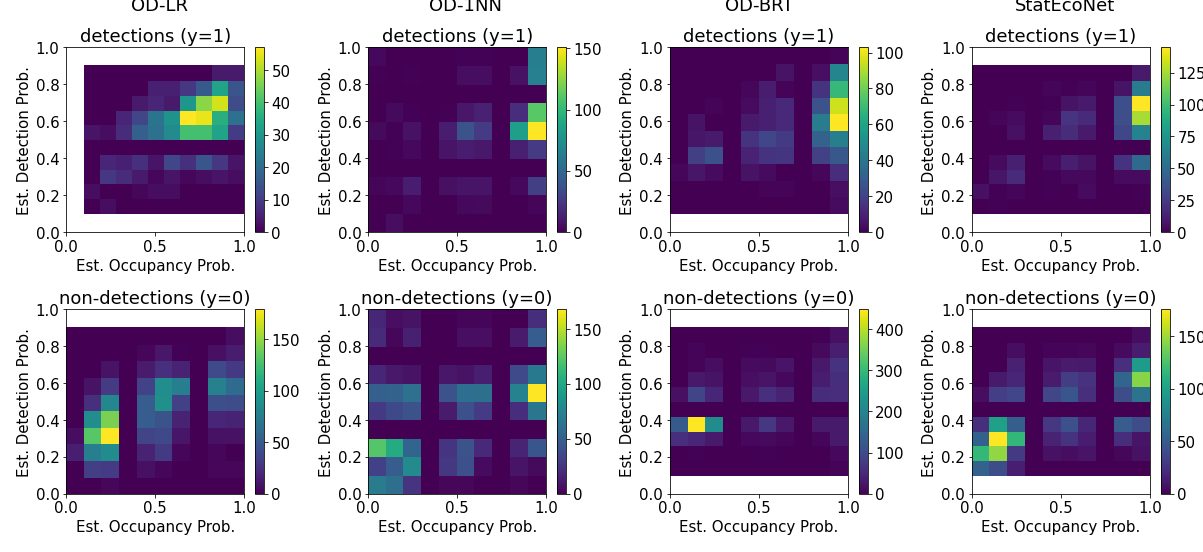

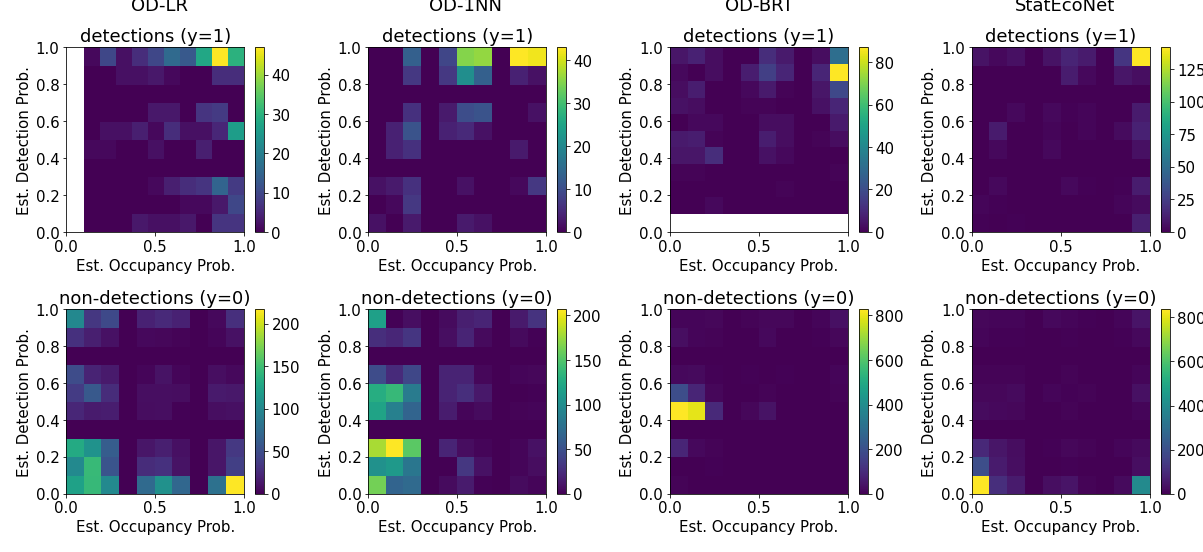

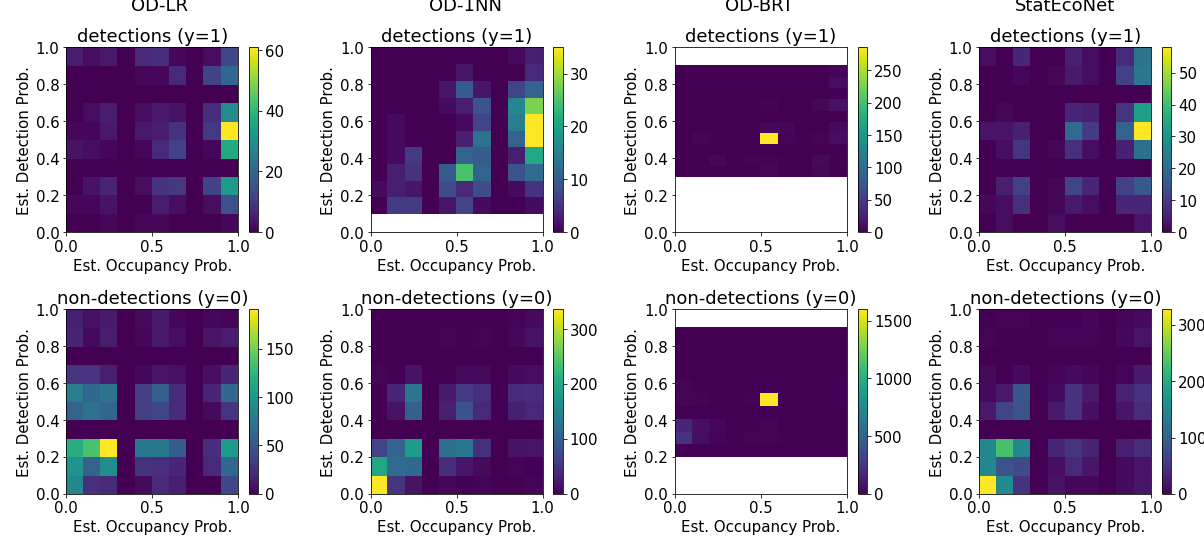

In [8]:
get_fig5("Common Yellowthroat", 0, 0.001, 0.001)
get_fig5("Eurasian Collared-Dove", 0.001, 0, 0.001)
get_fig5("Song Sparrow", 0.01, 0.01, 0.01)
get_fig5("Western Meadowlark", 0.01, 0.01, 0.01)
get_fig5("Pacific Wren", 0.01, 0, 0.001)

# Selected Important Real-World Features

In [9]:
x_dim = 28
w_dim = 3
def show_feature_selection(species_name, fold, model3_reg):
    k = 3
    opts = pd.read_csv("opt/opt_bird_NN.csv")
    nn_result = pd.read_csv("AAAI21/NN_test_" + species_name + ".csv")
    brt_features = pd.read_csv("AAAI21/brt_bird_features.csv")
    dir_path = "AAAI21/supplement/results/birds/"

    # 1. OD-LR
    model_id = 0
    tmp = nn_result[(nn_result["fold"] == fold) & \
                    (nn_result["model.id"] == 0)]
    assert len(tmp) == 10
    trial = np.argmax(tmp['test.auprc']) + 1
    if species_name == "Pacific Wren":
        full_path = dir_path + species_name + "_f" + str(fold) + \
                    "_m" + str(model_id) + "_w" + str(0) + "_t" + str(trial)
    else:
        full_path = dir_path + species_name + "_f" + str(fold) + \
                    "_m" + str(model_id) + "_t" + str(trial)
    opt = opts[(opts.speices==species_name) & (opts.fold==fold) & \
               (opts.model_id==model_id)]
    final1_model = OD_LR_Combined(x_dim, w_dim, k)
    final1_model.load_state_dict(torch.load(full_path + "_final_model.pt"))
    occ1_data = torch.norm(\
                list(final1_model.parameters())[0], dim=0).detach().numpy()
    det1_data = torch.norm(\
                list(final1_model.parameters())[2], dim=0).detach().numpy()
    topK = np.array(occ1_data).argsort()[-5:][::-1]
    topK = np.array(det1_data).argsort()[-5:][::-1]

    # 2. OD-1NN
    model_id = 1
    tmp = nn_result[(nn_result["fold"] == fold) & \
                    (nn_result["model.id"] == 1) & \
                    (nn_result["model.id"] == 1)]
    assert len(tmp) == 10
    trial = np.argmax(tmp['test.auprc']) + 1
    full_path = dir_path + species_name + "_f" + str(fold) \
                + "_m" + str(model_id) + "_w" + str(0) + "_t" + str(trial)
    opt = opts[(opts.speices==species_name) & (opts.fold==fold) & \
               (opts.model_id==model_id)]
    nN = int(opt['nNeurons'].item())
    final2_model = OD_1NN(x_dim, w_dim, k, nN)
    final2_model.load_state_dict(torch.load(full_path + "_final_model.pt"))
    occ2_data = torch.norm(\
                list(final2_model.parameters())[0], dim=0).detach().numpy()
    det2_data = torch.norm(\
                list(final2_model.parameters())[4], dim=0).detach().numpy()
    topK = np.array(occ2_data).argsort()[-5:][::-1]
    topK = np.array(det2_data).argsort()[-5:][::-1]

    # 4. StatEcoNet
    model_id = 3
    tmp = nn_result[(nn_result["fold"] == fold) & \
                    (nn_result["model.id"] == 3) & \
                    (nn_result["mixed.weight"] == model3_reg)]
    assert len(tmp) == 10
    trial = np.argmax(tmp['test.auprc']) + 1
    full_path = dir_path + species_name + "_f" + str(fold) + \
                "_m" + str(model_id) + "_w" + str(model3_reg)  + "_t" + str(trial)
    # NOTE: changed model_id for StatEcoNet from 3 to 2 for offical use
    opt = opts[(opts.speices==species_name) & (opts.fold==fold) & \
               (opts.model_id==2)]
    nN= int(opt['nNeurons'].item())
    nL= int(opt['nLayers'].item())
    if nL == 1:
        final4_model = StatEcoNet_H1_Combined(x_dim, w_dim, nN, k)
    else:
        final4_model = StatEcoNet_H3_Combined(x_dim, w_dim, nN, k)
    final4_model.load_state_dict(torch.load(full_path + "_final_model.pt"))
    occ4_data = torch.norm(\
                list(final4_model.parameters())[0], dim=0).detach().numpy()
    det4_data = torch.norm(\
                list(final4_model.parameters())[2], dim=0).detach().numpy()
    topK = occ4_data.argsort()[-5:][::-1]
    topK = det4_data.argsort()[-5:][::-1]

    # 3. BRT
    tmp = brt_features[(brt_features["species_name"] == species_name) & \
                       (brt_features["fold"] == fold)]
    brt_site = tmp.iloc[0,2:30].tolist()
    brt_survey = tmp.iloc[0,31:62].tolist()
    occ3_data = brt_site
    det3_data = brt_survey
    assert len(occ3_data) == x_dim
    assert len(det3_data) == x_dim + w_dim
    topK = np.array(occ3_data).argsort()[-5:][::-1]
    topK = np.array(det3_data).argsort()[-5:][::-1]

    return(occ1_data, det1_data, occ2_data, det2_data, np.array(occ3_data), \
           np.array(det3_data), occ4_data, det4_data)

In [10]:
def get_important_features(species_name, f1_mix, f2_mix, f3_mix, \
                           key_occ_feature, key_det_feature):
    fea_idx = pd.read_csv("AAAI21/feature_idx.csv", header=None)
    f1_occ1, f1_det1, f1_occ2, f1_det2, f1_occ3, f1_det3, f1_occ4, f1_det4 = \
    show_feature_selection(species_name, 1, f1_mix)
    f2_occ1, f2_det1, f2_occ2, f2_det2, f2_occ3, f2_det3, f2_occ4, f2_det4 = \
    show_feature_selection(species_name, 2, f2_mix)
    f3_occ1, f3_det1, f3_occ2, f3_det2, f3_occ3, f3_det3, f3_occ4, f3_det4 = \
    show_feature_selection(species_name, 3, f3_mix)

    # Important site features
    supp_bird_site_features(f1_occ1, f2_occ1, f3_occ1, \
                            f1_occ2, f2_occ2, f3_occ2, \
                            f1_occ3, f2_occ3, f3_occ3, \
                            f1_occ4, f2_occ4, f3_occ4, x_dim, w_dim, \
                            fea_idx, key_occ_feature, \
                            species_name+"_occ_features" )
    # Important survey features
    supp_bird_survey_features(f1_det1, f2_det1, f3_det1, \
                              f1_det3, f2_det3, f3_det3, \
                              f1_det4, f2_det4, f3_det4, x_dim, w_dim, \
                              fea_idx, key_det_feature, \
                              species_name+"_det_features")

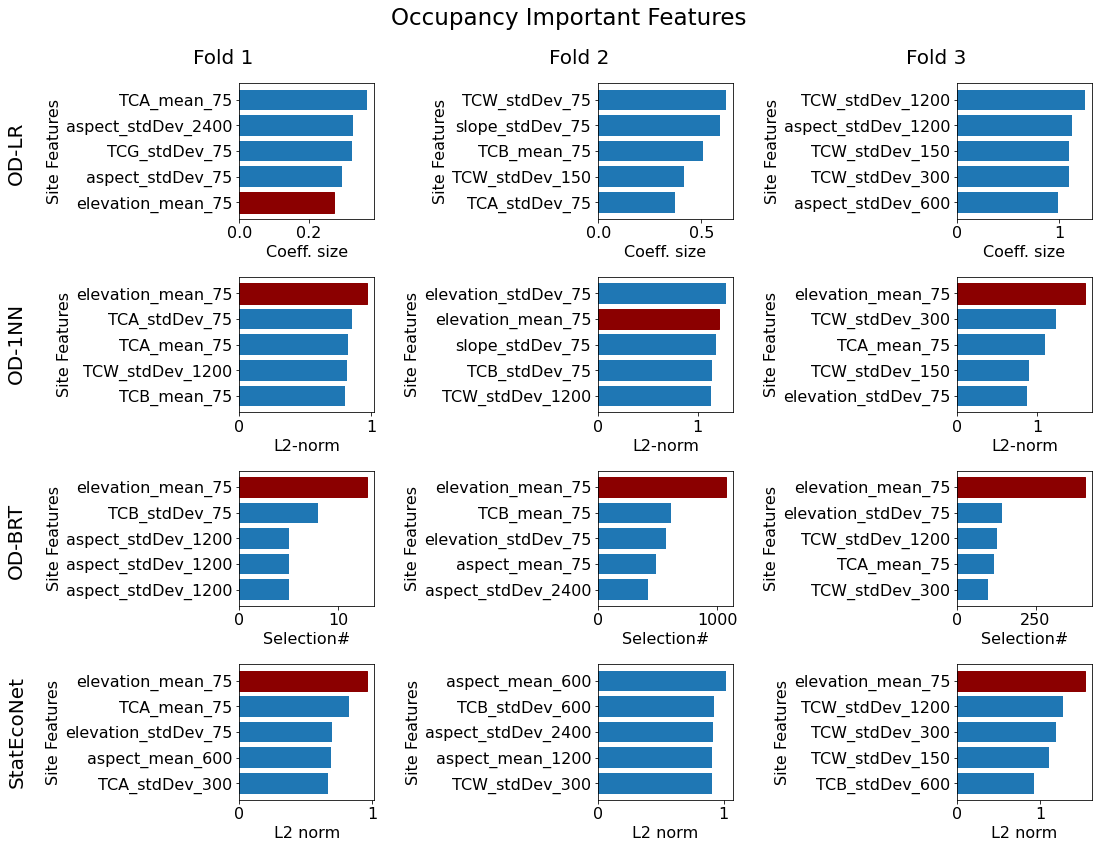

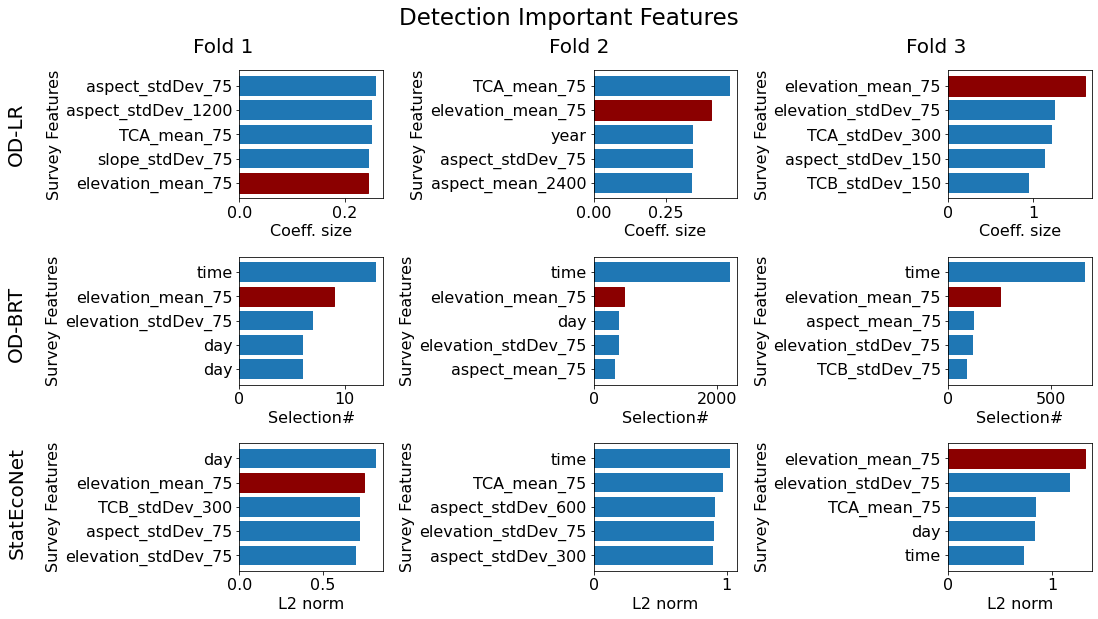

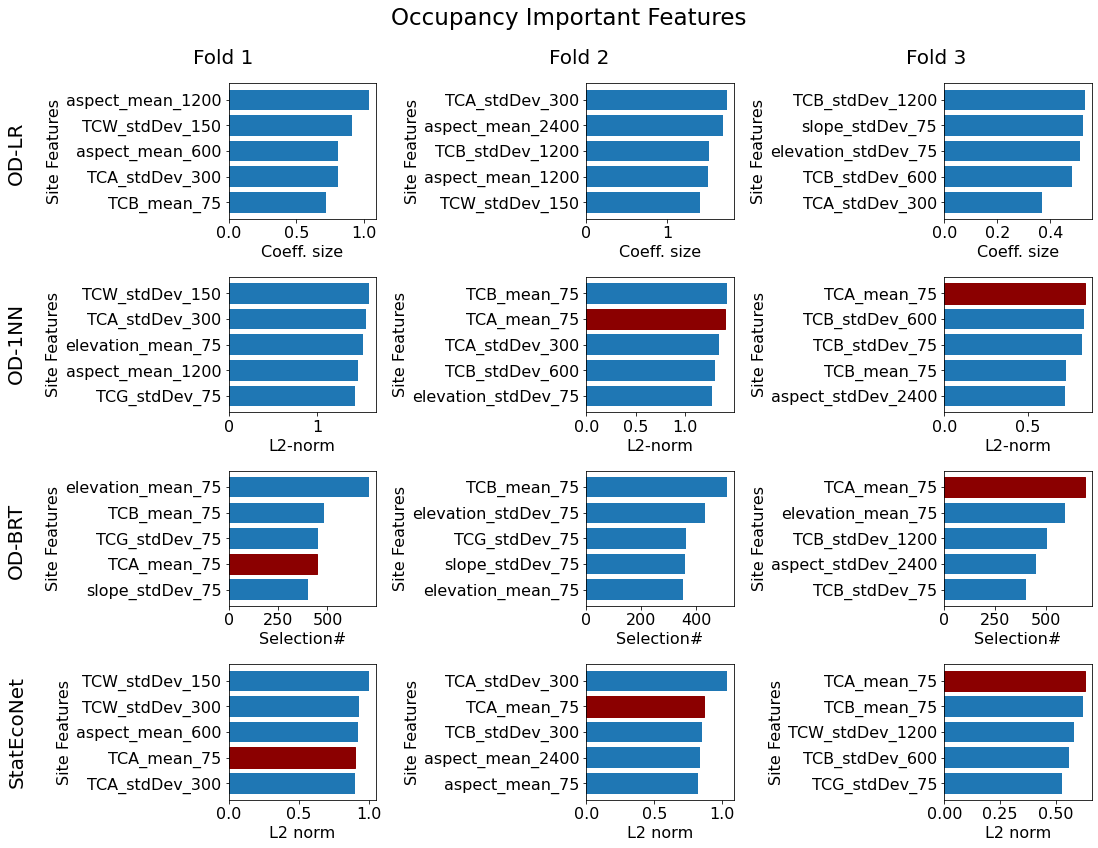

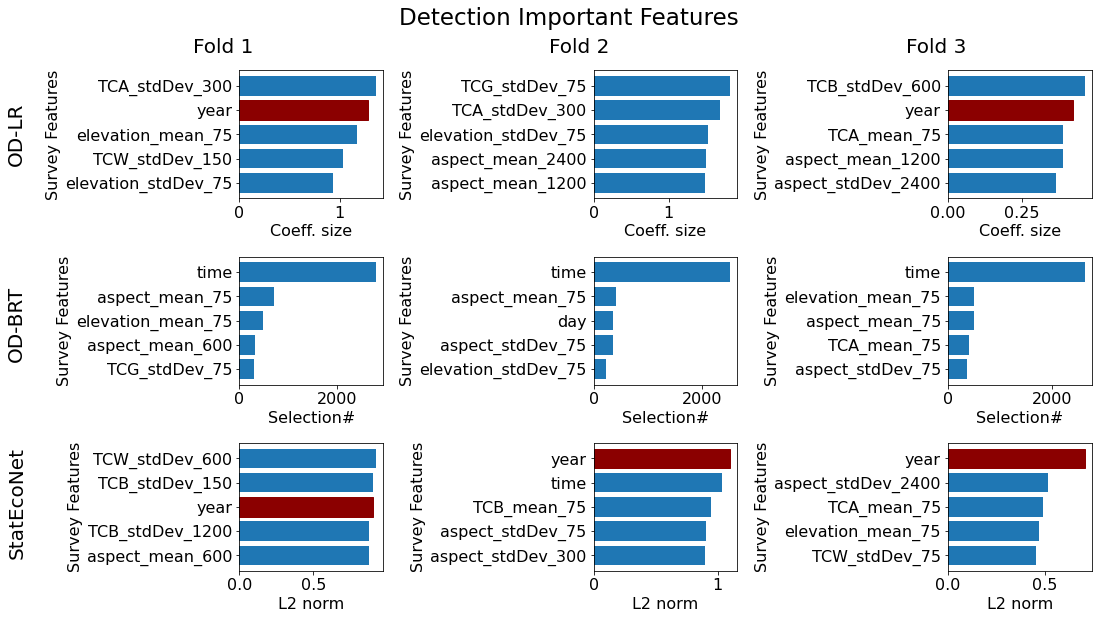

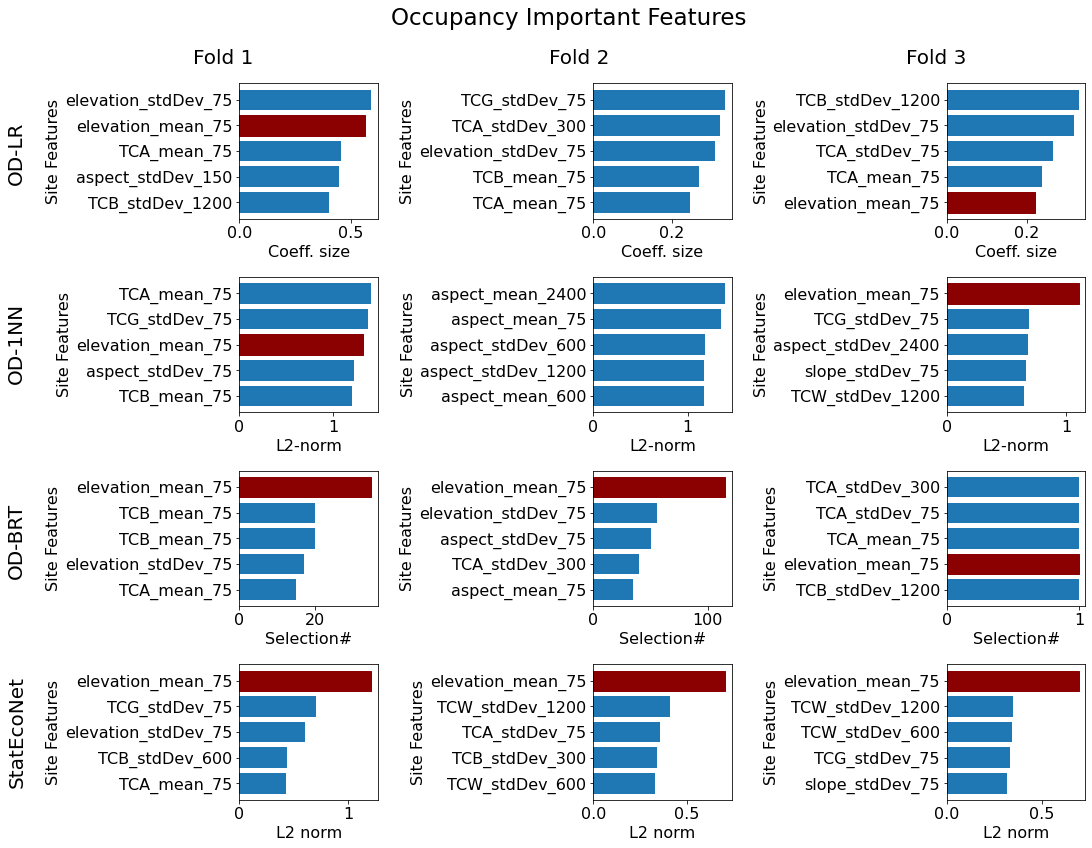

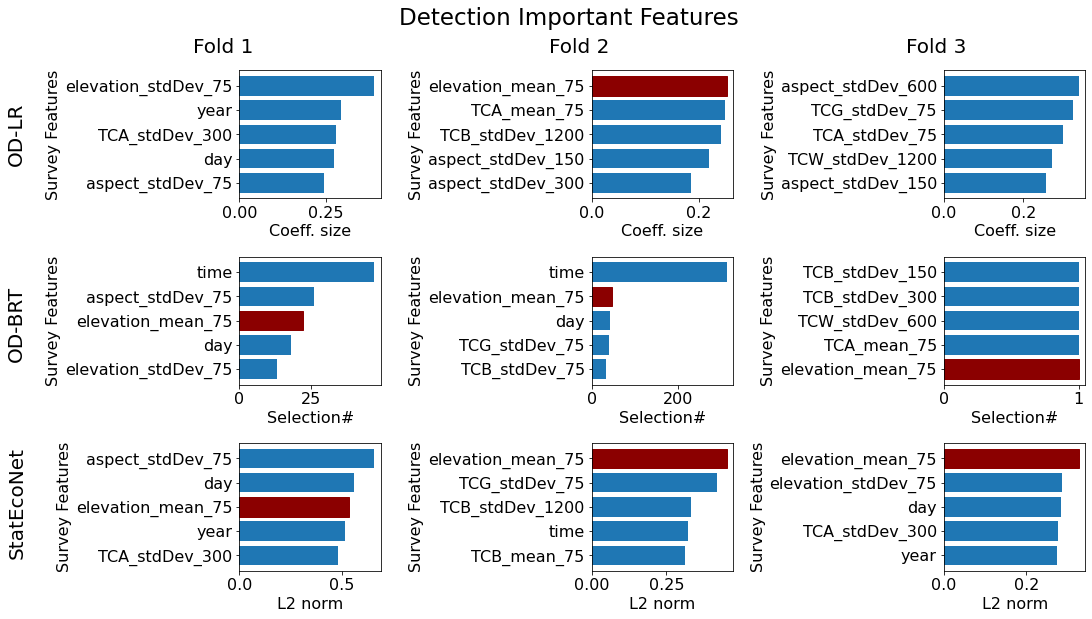

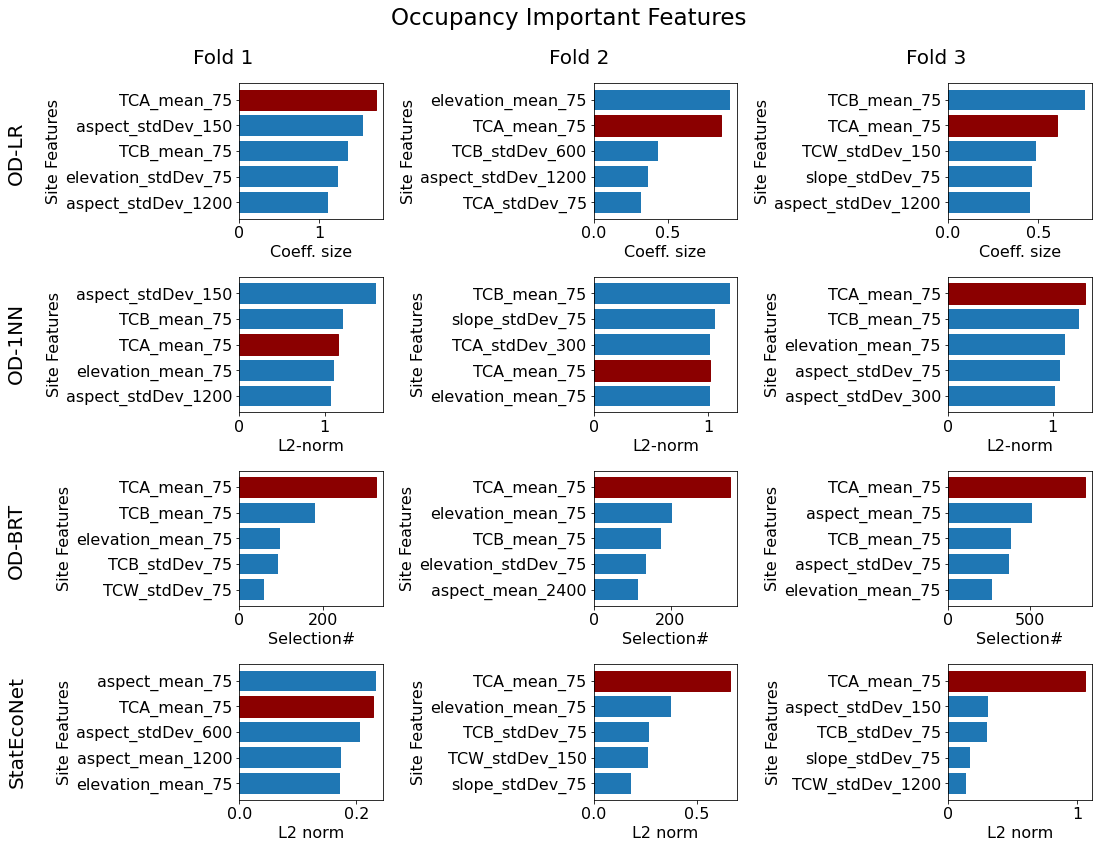

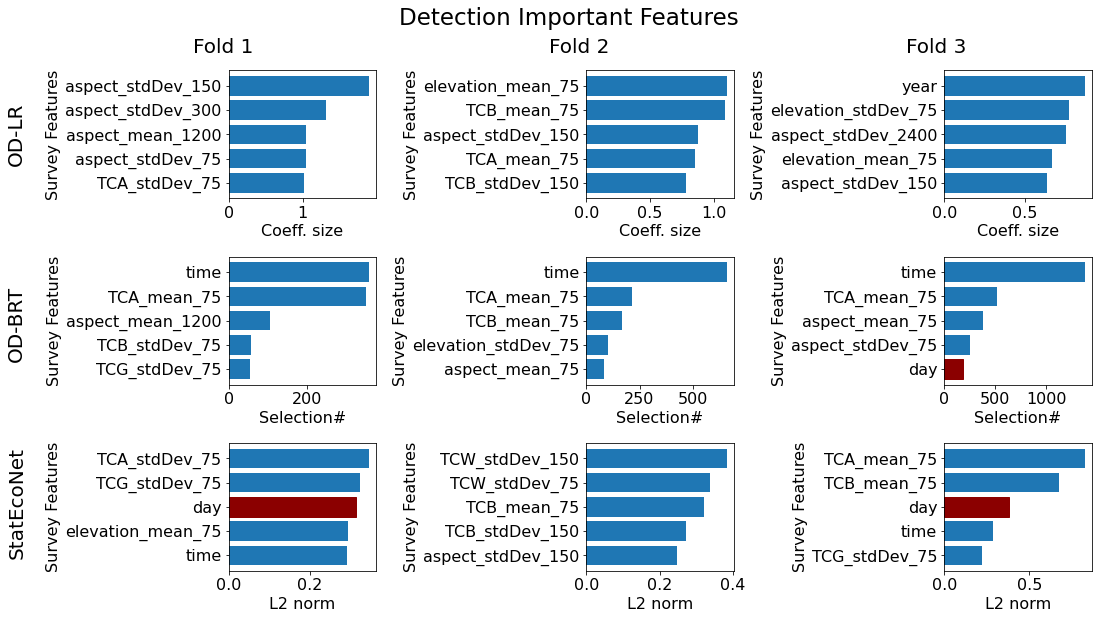

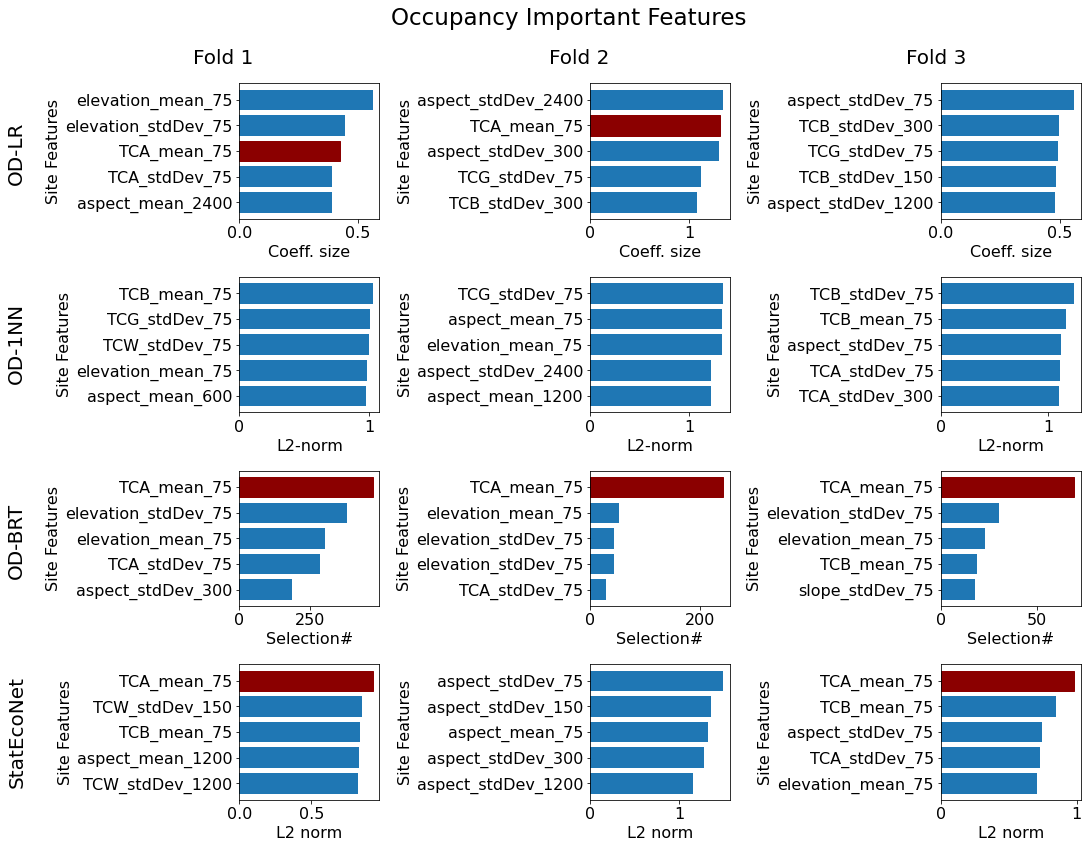

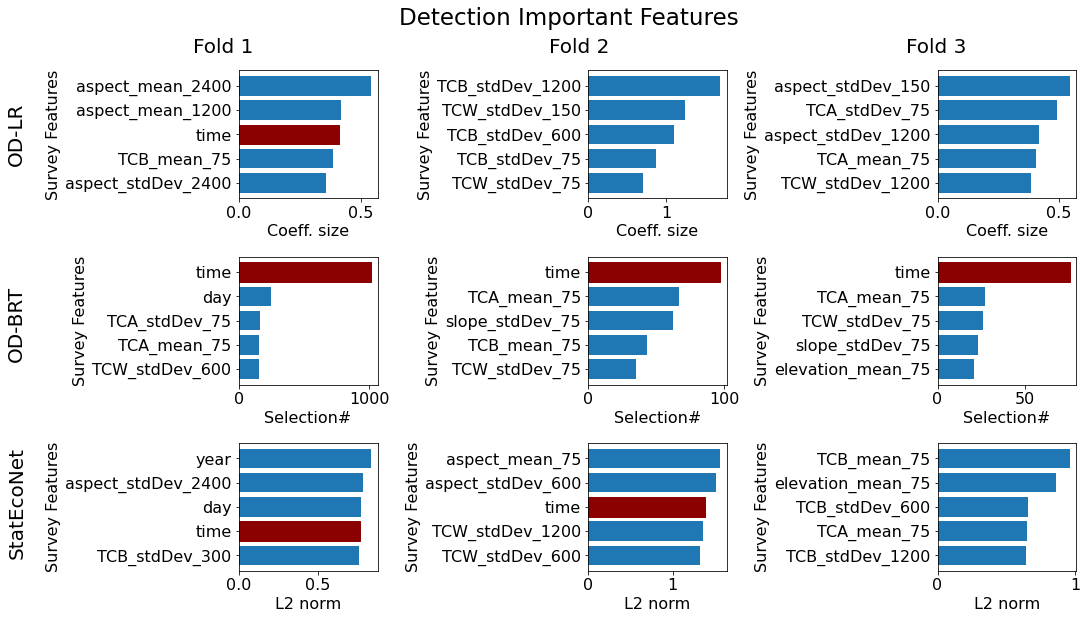

In [11]:
get_important_features("Common Yellowthroat", 0, 0.001, 0.001, \
                       "elevation_mean_75", "elevation_mean_75")
get_important_features("Eurasian Collared-Dove", 0.001, 0, 0.001, \
                       "TCA_mean_75", "year")
get_important_features("Song Sparrow", 0.01, 0.01, 0.01, \
                       "elevation_mean_75", "elevation_mean_75")
get_important_features("Western Meadowlark", 0.01, 0.01, 0.01, \
                       "TCA_mean_75", "day")
get_important_features("Pacific Wren", 0.01, 0, 0.001, \
                       "TCA_mean_75", "time")